In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import collections
import operator
%matplotlib inline

# Set font style
font = {'family':'Ubuntu',
        'weight' : '200',
        'size'   : 14}

matplotlib.rc('font', **font)

In [5]:
# Import cleaned data (if you used the "10oct Merging files"-script and want to import 10oct data,
# then use lines=True and orient='records' as parameters)
data8 = pd.read_json('8oct_pre_processed.json')
data10 = pd.read_json('10oct_pre_processed_merged.json', lines=True, orient='records')

# Social Influencers
In this notebook we take a look at the individuals/user accounts who were most influential during 8th and 10th of October. 

## Calculate simple influence score for each tweet
Simple influence score is calculated using following formula:  

$ S_{infl}(tweet_i) = \alpha*|favorites|+\beta*|retweets| $

, where $ \alpha $ represents the weight given for favorite and $ \beta $ weight given for retweet. Here we are using values $ \alpha = 1 $ and $ \beta = 3 $, which give a very rough approximate of the amount of social influence gained by each tweet. Our reasoning here is that retweets propagate through the social media space and therefore their effect on other is much greater than just favorites'. Therefore in our estimate __each retweet has 3 times the weight of a single favorite__. We think that this is a rather conservative estimate.

In [15]:
data8['infl_score'] = data8['favorite_count'] + (3 * data8['retweet_count'])
data10['infl_score'] = data10['favorite_count'] + (3 * data10['retweet_count'])

In [18]:
# Split into two datasets, one including retweets and one that only includes original tweets
data_orig8 = data8[data8['is_retweet'] == 0]
data_orig10 = data10[data10['is_retweet'] == 0]

data8.shape, data10.shape, data_orig8.shape, data_orig10.shape

((569980, 28), (1451509, 28), (81474, 28), (295313, 28))

## Calculate simple social influence scores for each user
We can calculate a simple metric / influence score for each user that tells just how much that particular user's average tweet has had effect on others (on a given timeframe).  

$\large P_{infl} = \frac{\sum_{i \in t} S_{infl}(tweet_i)}{n} $

, where $ t $ is the collection of user's tweets and n the amount of tweets. This is simply a weighted AVG over the influence scores of the tweets written by the user. This score ignores retweets.

---

# Top Influence Score per tweet 
## 8th October
### Top 50 (all languages)

In [ ]:
data_orig8['Username'] = data_orig8.loc[:,'user_name']
data_orig8['Favorited'] = data_orig8.loc[:,'favorite_count']
data_orig8['Influence Score'] = data_orig8.loc[:,'infl_score']
data_orig8['Retweeted'] = data_orig8.loc[:,'retweet_count']

data_orig10['Username'] = data_orig10.loc[:,'user_name']
data_orig10['Favorited'] = data_orig10.loc[:,'favorite_count']
data_orig10['Influence Score'] = data_orig10.loc[:,'infl_score']
data_orig10['Retweeted'] = data_orig10.loc[:,'retweet_count']

In [27]:
user_data8.columns

Index(['favorite_count', 'infl_score', 'retweet_count'], dtype='object')

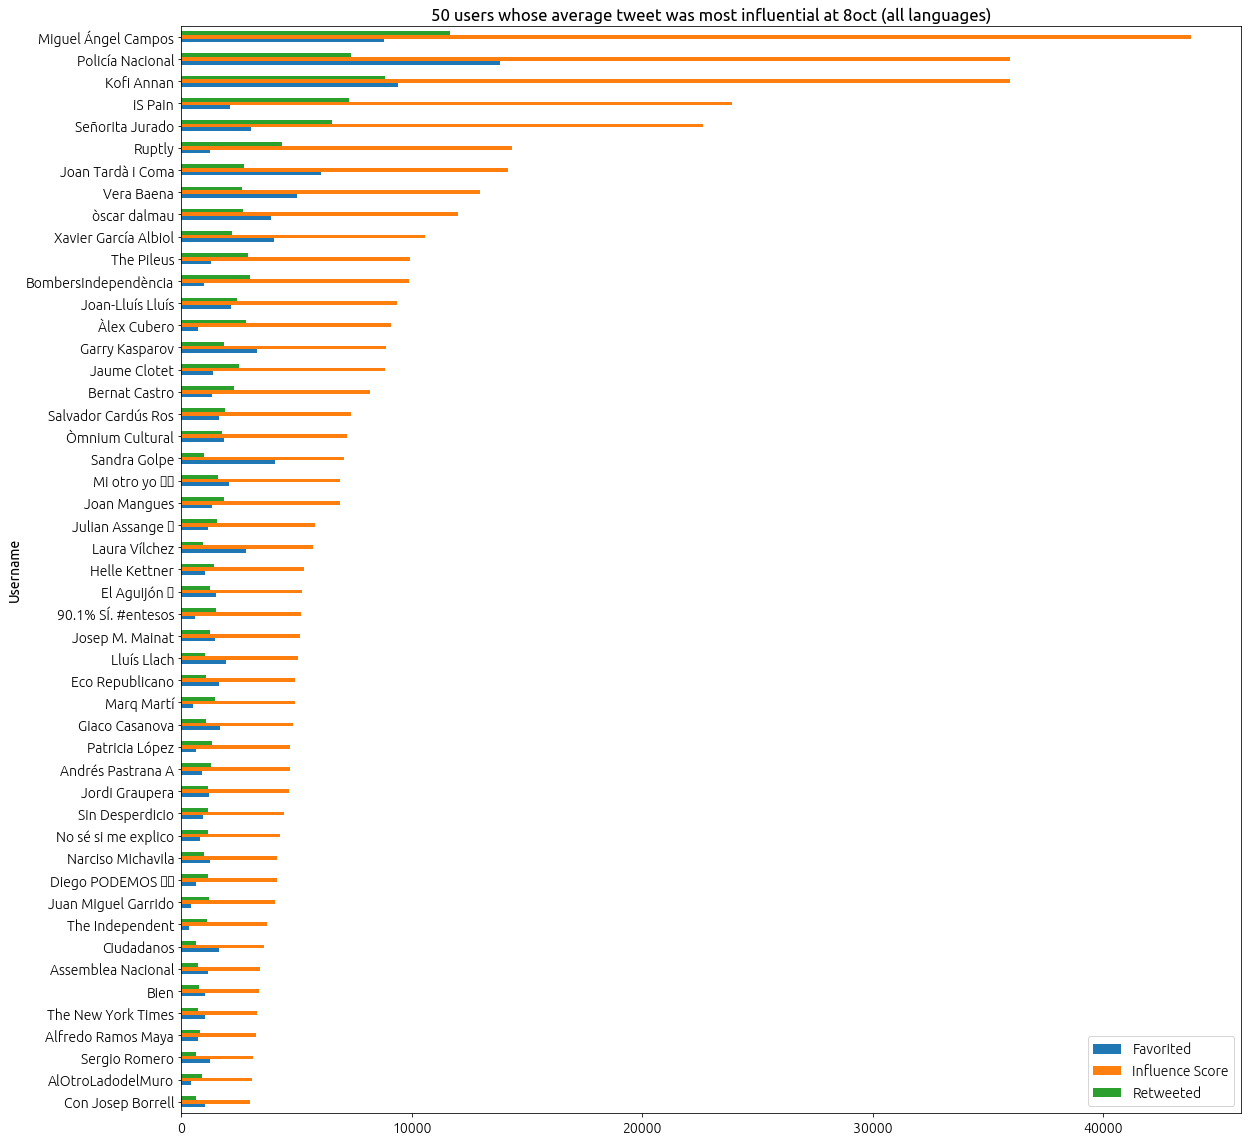

In [61]:
user_data8 = data_orig8.pivot_table(index='Username', values=['Influence Score','Favorited','Retweeted'], aggfunc='mean') 
user_infl_top50 = user_data8.sort_values(by='Influence Score', ascending=True)[-50:-1]
user_infl_top50.plot.barh(figsize=(19,20), title="50 users whose average tweet was most influential at 8oct (all languages)")
plt.savefig('avg_infl_8.png')

### Top 10 (all languages)

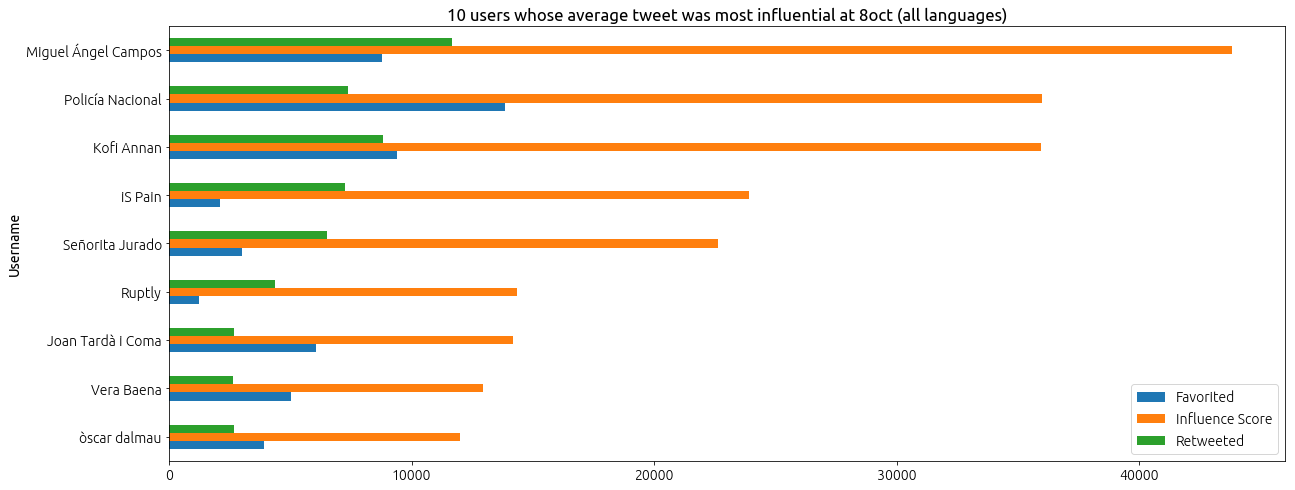

In [58]:
user_data8 = data_orig8.pivot_table(index='Username', values=['Influence Score','Favorited','Retweeted'], aggfunc='mean')
user_infl_top20 = user_data8.sort_values(by='Influence Score', ascending=True)[-10:-1]
user_infl_top20.plot.barh(figsize=(20,8), title="10 users whose average tweet was most influential at 8oct (all languages)")
plt.savefig('top10_avg_infl_8.png')

## 10th October

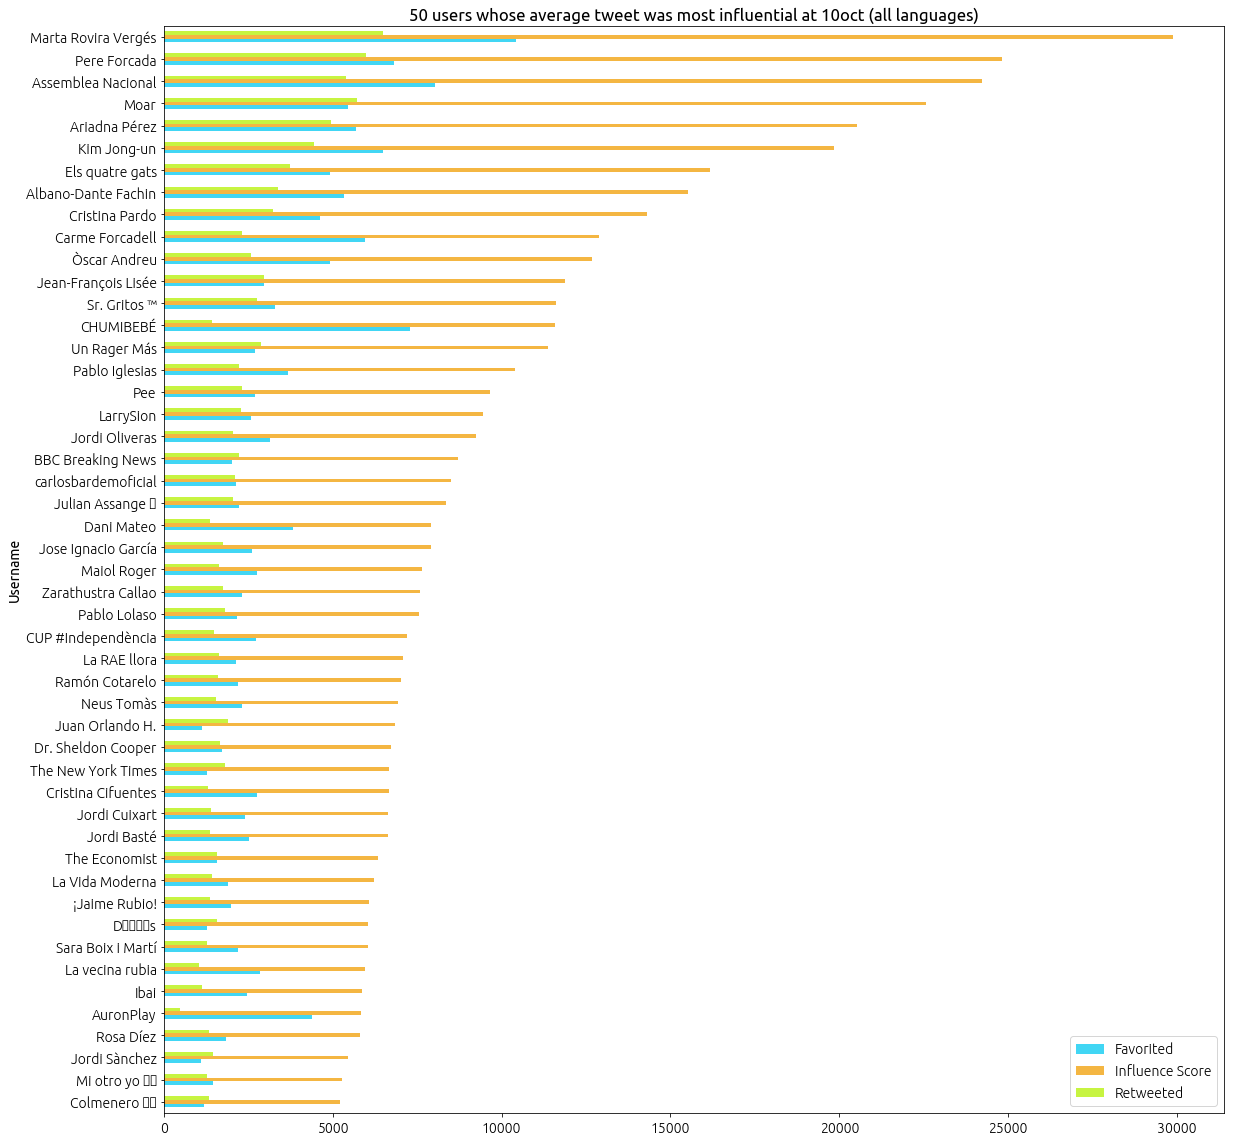

In [65]:
user_data10 = data_orig10.pivot_table(index='Username', values=['Influence Score','Favorited','Retweeted'], aggfunc='mean') 
user_infl_top50 = user_data10.sort_values(by='Influence Score', ascending=True)[-50:-1]
user_infl_top50.plot.barh(figsize=(19,20), color=['#41d6f4','#f4b642','#c7f441'], title="50 users whose average tweet was most influential at 10oct (all languages)")
plt.savefig('avg_infl_10.png')

### Top 10 (all languages)

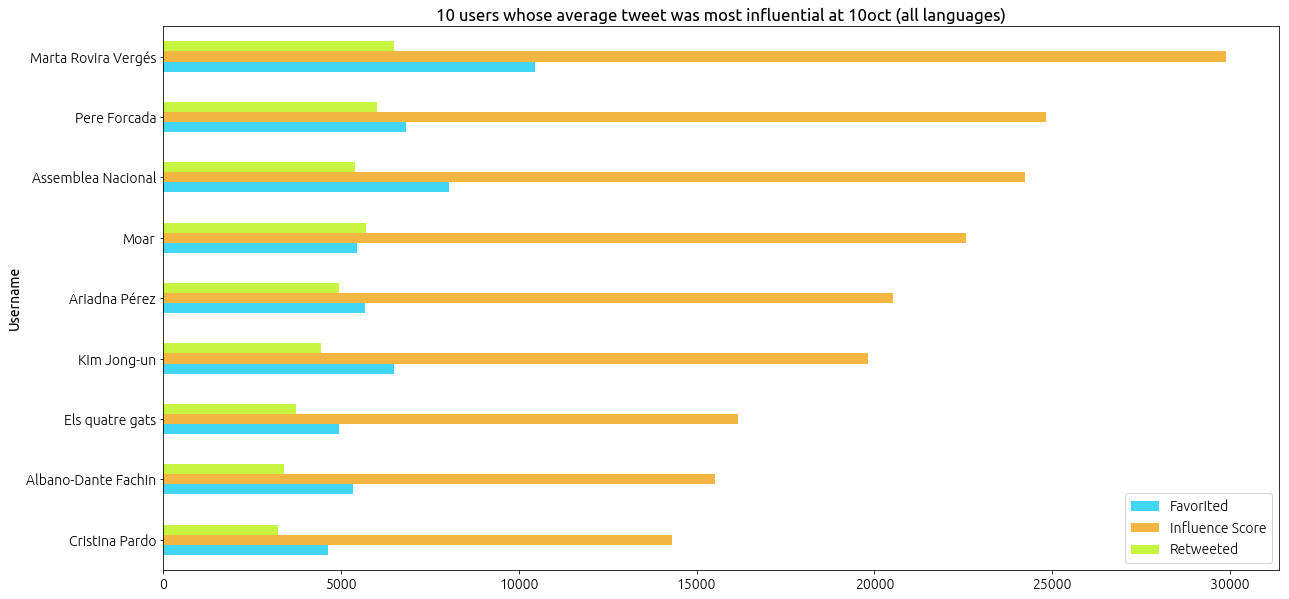

In [67]:
user_data10 = data_orig10.pivot_table(index='Username', values=['Influence Score','Favorited','Retweeted'], aggfunc='mean')
user_infl_top20 = user_data10.sort_values(by='Influence Score', ascending=True)[-10:-1]
user_infl_top20.plot.barh(figsize=(20,10), color=['#41d6f4','#f4b642','#c7f441'], title="10 users whose average tweet was most influential at 10oct (all languages)")
plt.savefig('top10_avg_infl_10.png')

# Top 50 Influence Scores (whole day)
## 8th Oct

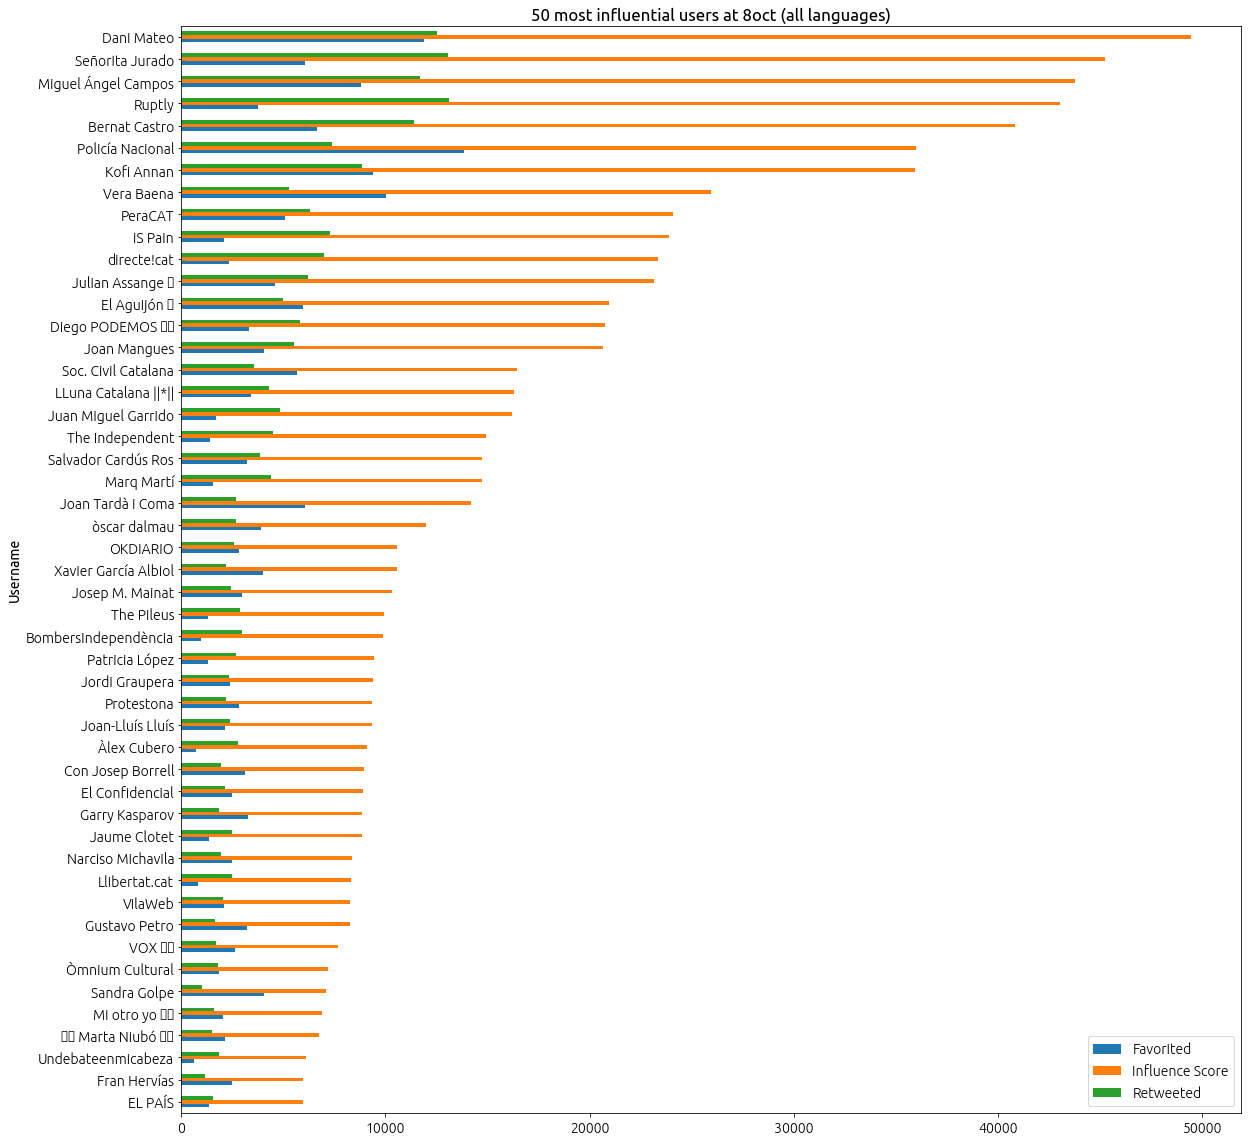

In [71]:
user_data8 = data_orig8.pivot_table(index='Username', values=['Influence Score','Favorited','Retweeted'], aggfunc='sum') 
user_infl_top50 = user_data8.sort_values(by='Influence Score', ascending=True)[-50:-1]
user_infl_top50.plot.barh(figsize=(19,20), title='50 most influential users at 8oct (all languages)')
plt.savefig('sum_infl_8.png')

### Top 10 (all languages)

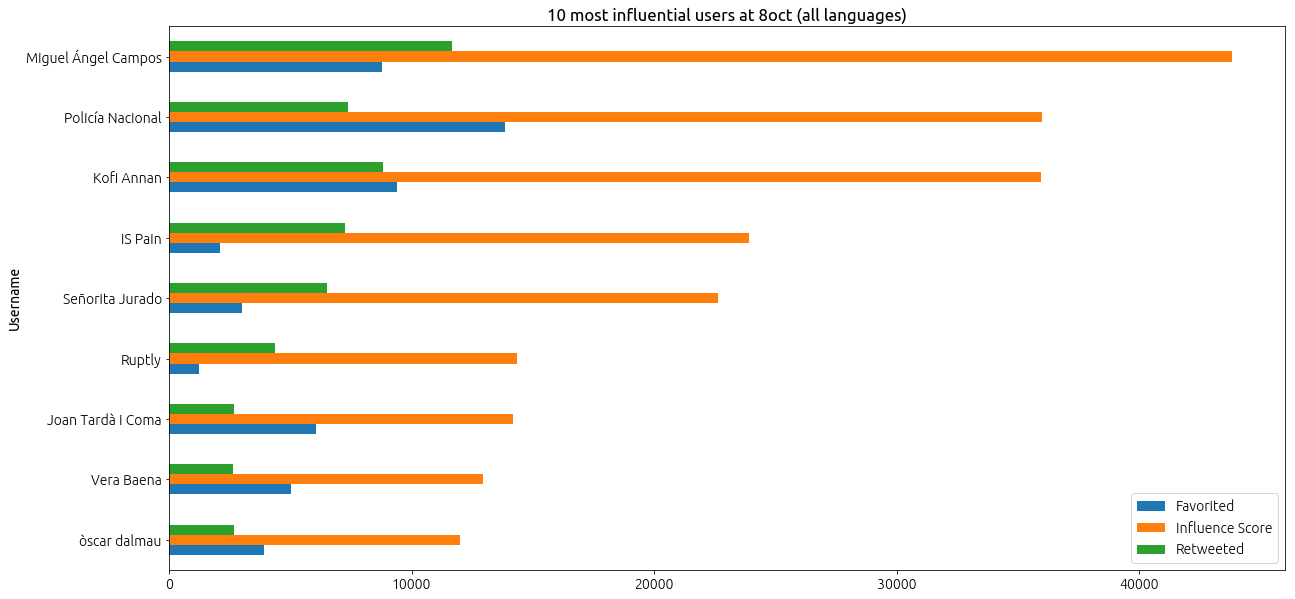

In [68]:
user_infl_top50 = user_data8.sort_values(by='Influence Score', ascending=True)[-10:-1]
user_infl_top50.plot.barh(figsize=(20,10), title='10 most influential users at 8oct (all languages)')
plt.savefig('sum_infl_8.png')

## 10th October

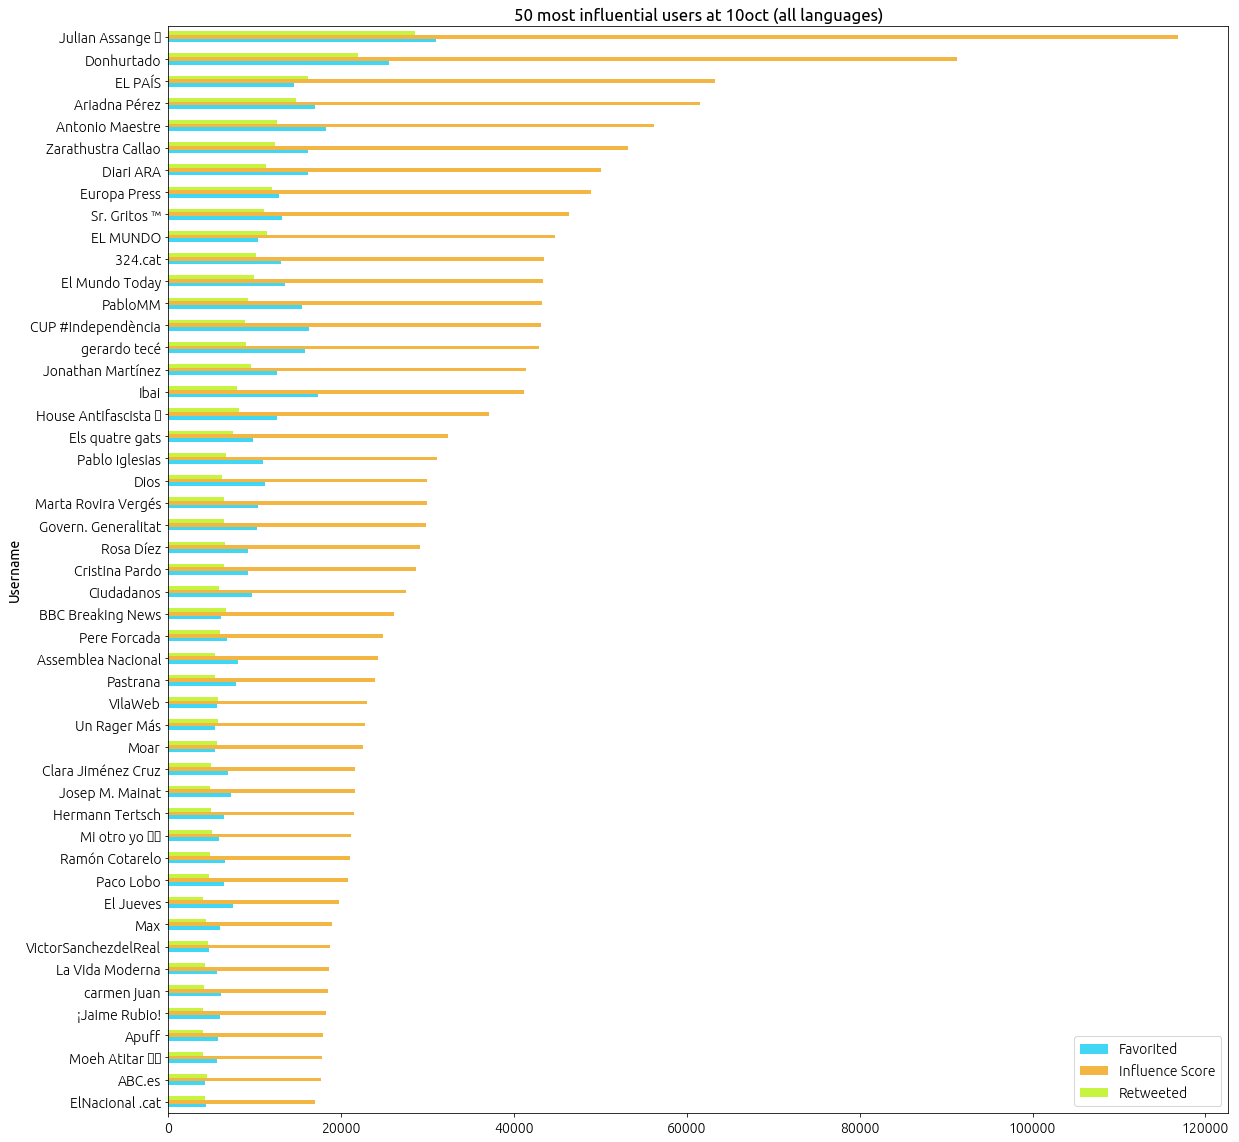

In [69]:
user_data10 = data_orig10.pivot_table(index='Username', values=['Influence Score','Favorited','Retweeted'], aggfunc='sum') 
user_infl_top50 = user_data10.sort_values(by='Influence Score', ascending=True)[-50:-1]
user_infl_top50.plot.barh(figsize=(19,20), color=['#41d6f4','#f4b642','#c7f441'], title='50 most influential users at 10oct (all languages)')
plt.savefig('sum_infl_10.png')

### Top 10 (all languages)

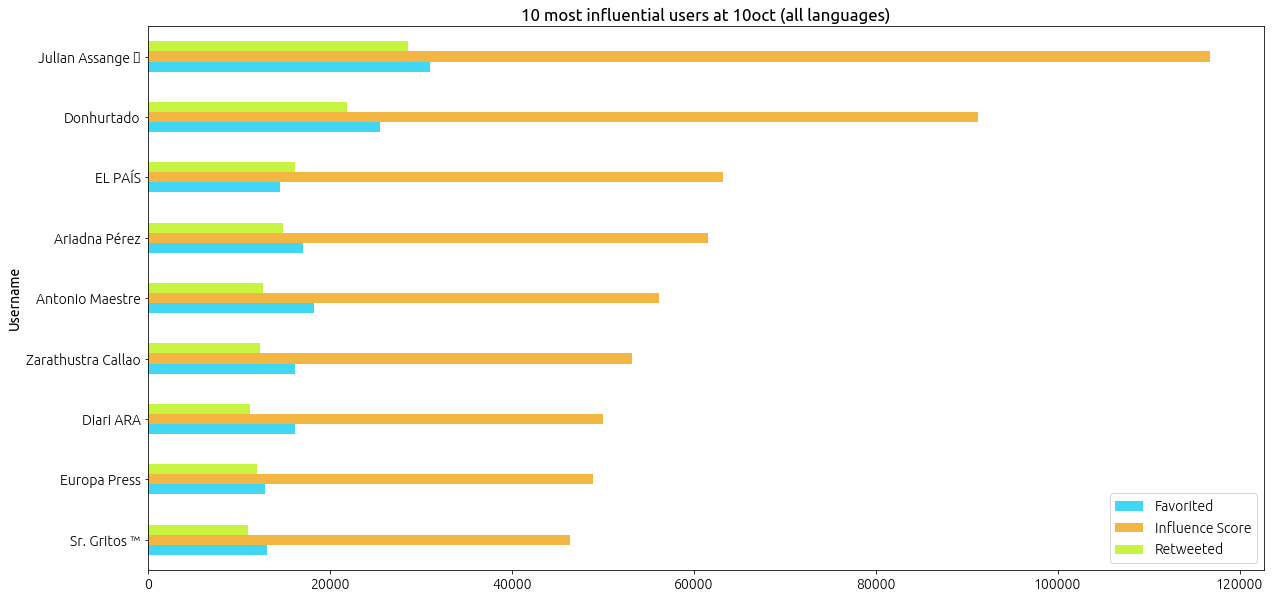

In [70]:
user_infl_top50 = user_data10.sort_values(by='Influence Score', ascending=True)[-10:-1]
user_infl_top50.plot.barh(figsize=(20,10), color=['#41d6f4','#f4b642','#c7f441'], title='10 most influential users at 10oct (all languages)')
plt.savefig('sum_infl10_10.png')

## Top tweeters

In [72]:
data8_count = data8
data8_count['original'] = [0 if val == 1 else 1 for val in data8_count['is_retweet']]  
data8_count['retweet'] = data8_count['is_retweet']

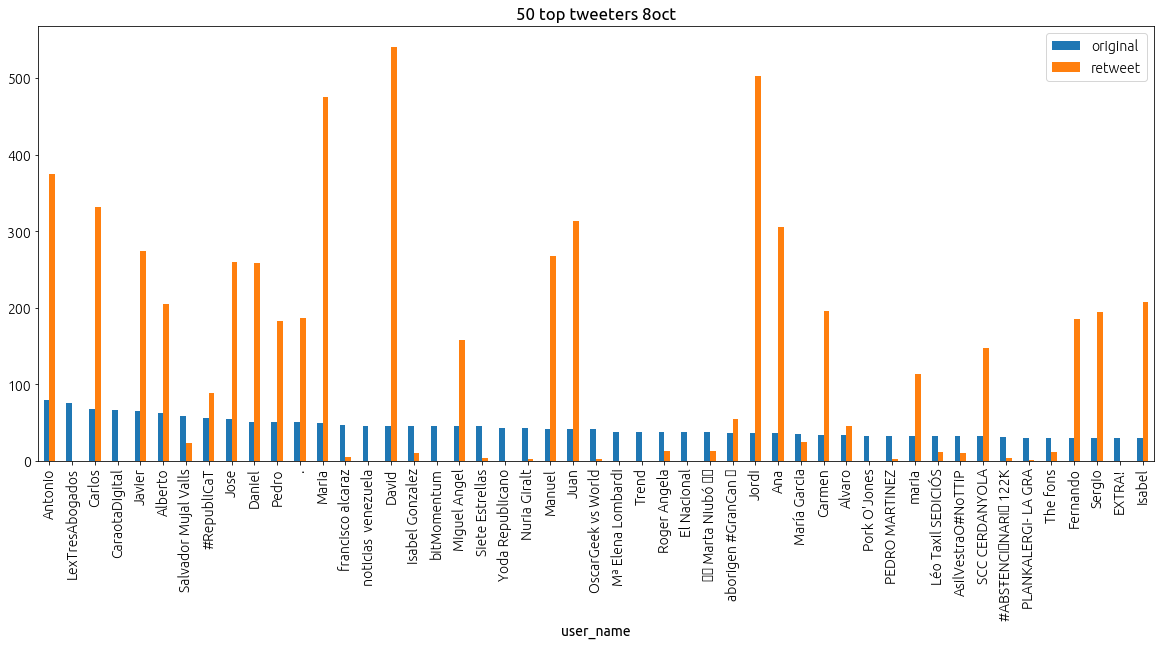

In [75]:
user_data8 = data8.pivot_table(index='user_name', values=['original','retweet'], aggfunc='sum')
user_count_top20 = user_data8.sort_values(by='original', ascending=False)[1:50]
user_count_top20.plot.bar(figsize=(20,8), title='50 top tweeters 8oct')

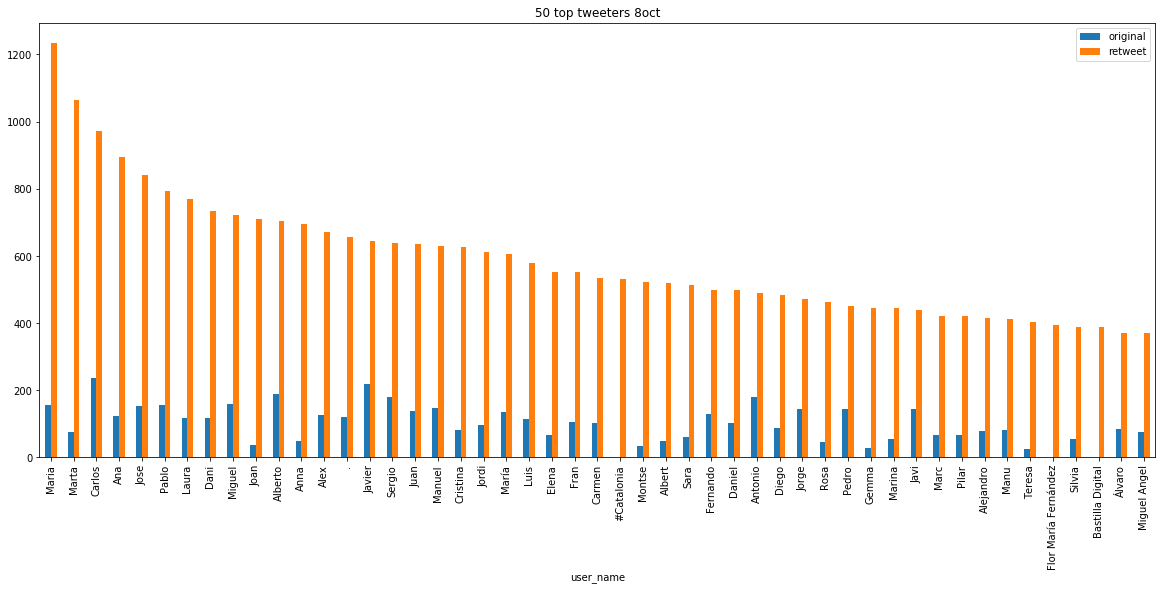

In [19]:
user_data8 = data8.pivot_table(index='user_name', values=['original','retweet'], aggfunc='sum')
user_count_top20 = user_data8.sort_values(by='retweet', ascending=False)[1:50]
user_count_top20.plot.bar(figsize=(20,8), title='50 top tweeters 8oct')

# Top users with only retweets

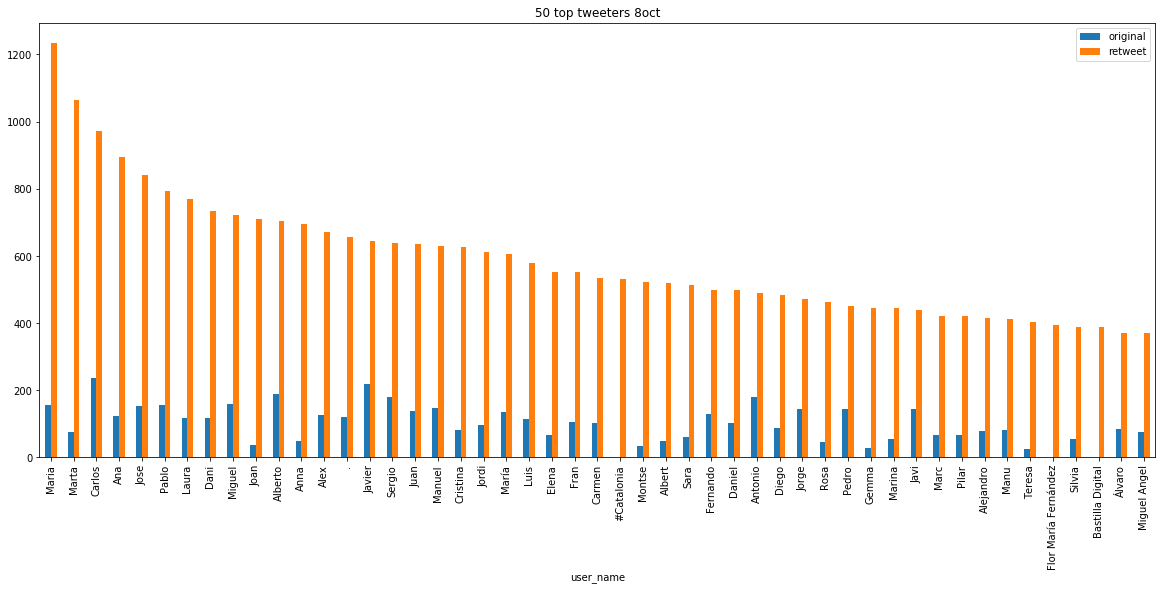

In [20]:
user_data8 = data8.pivot_table(index='user_name', values=['original','retweet'], aggfunc='sum')
user_count_top20 = user_data8.sort_values(by='retweet', ascending=False)[1:50]
user_count_top20.plot.bar(figsize=(20,8), title='50 top tweeters 8oct')

# 4. Most frequent tweeters

## Including retweets

In [27]:
counted_inc = collections.Counter(data['user_screen_name'])
tweet_freq_inc = sorted(counted_inc.items(), key=operator.itemgetter(1))

In [28]:
tweet_freq_inc[:-20:-1]

[('CatalanRobot', 276),
 ('Rojaconarte', 188),
 ('REscolaMarco', 181),
 ('SCC_Cerdanyola', 179),
 ('Belit88', 169),
 ('Anday26209982', 157),
 ('LolaLop22360512', 147),
 ('JuntsPelSi_Cat', 145),
 ('nu_damian', 140),
 ('kinbota', 135),
 ('huguet_gabriel', 129),
 ('Diequi', 125),
 ('Wittgenstein_jm', 124),
 ('asiandafrica', 123),
 ('pallaron12', 121),
 ('AngelesBN3', 120),
 ('Mazius069', 117),
 ('marisaparrilla', 116),
 ('aneshali', 116)]

## Excluding retweets

In [29]:
counted_exc = collections.Counter(data['user_screen_name'][data['is_retweet'] == 0])
tweet_freq_exc = sorted(counted_exc.items(), key=operator.itemgetter(1))

In [30]:
tweet_freq_exc[:-20:-1]

[('lextresabogados', 76),
 ('CaraotaDigital', 66),
 ('smujal', 58),
 ('JuntsPelSi_Cat', 56),
 ('falcarazfer', 47),
 ('notiven', 46),
 ('Estrellas_Siete', 45),
 ('bitMomentum', 45),
 ('larosadereus', 44),
 ('Nuria_amb_seny', 43),
 ('Sanfermin00', 43),
 ('oscargeek', 41),
 ('rogerangela', 38),
 ('fractaltrend', 38),
 ('Mela_Lombardi', 38),
 ('ElNacionalWeb', 37),
 ('Marta_catalonia', 37),
 ('maximors63', 36),
 ('BlaancaNiieves', 35)]

## Top50 tweeters with no original tweets

In [31]:
top50 = set([tupl[0] for tupl in tweet_freq_inc[:-51:-1]])
top50_no_orig = top50 - set([tupl[0] for tupl in tweet_freq_exc])

In [32]:
top50_no_orig

{'Anday26209982',
 'AndreuViu',
 'AngelesBN3',
 'CatalanRobot',
 'Fl1chy',
 'LolaLop22360512',
 'LolaRicoMoral1',
 'MarcoDaCostaFX',
 'Mazius069',
 'SBachs',
 'carmelomayorv',
 'cfrd1909cat',
 'cienfuegos66',
 'dle9',
 'huguet_gabriel',
 'jasavalena',
 'josezpt',
 'kamipony',
 'lolibejarano',
 'nu_damian',
 'pallaron12',
 'quela68',
 'roserous_rosa',
 'vidaconpasion8'}

### Likely bots?